## Face Recognition Assignment
#### Using haarcascades to detect facial features and overlay sunglasses and moustache shaped snapchat filters on images of faces

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
eyes_cascade = cv2.CascadeClassifier('./train/third-party/frontalEyes35x16.xml')
nose_cascade = cv2.CascadeClassifier('./train/third-party/Nose18x15.xml')

In [3]:
def showImg(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()

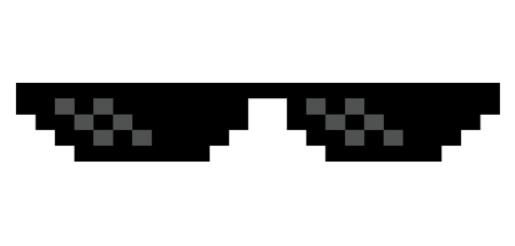

In [4]:
glasses = cv2.imread('./train/glasses.png', cv2.IMREAD_UNCHANGED)
# glasses = cv2.cvtColor(glasses, cv2.COLOR_BGR2RGB)
showImg(glasses)

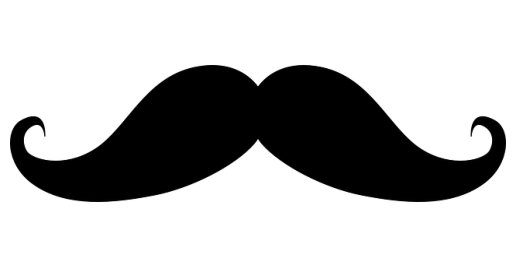

In [5]:
mustache = cv2.imread('./train/mustache.png', cv2.IMREAD_UNCHANGED)
# mustache = cv2.cvtColor(mustache, cv2.COLOR_BGR2RGB)
showImg(mustache)

In [6]:
def overlay(img):
    changed = img[:,:,:]
    eye_pair = None
    nose = None

    eye_pairs = eyes_cascade.detectMultiScale(changed, 1.4, 5)
    if len(eye_pairs) == 0:
        print("Error: eye pair could not be found")
        return
    else:
        eye_pair = eye_pairs[0]

    noses = nose_cascade.detectMultiScale(changed, 1.2, 5)
    if len(noses) == 0:
        print("Error: nose could not be found")
        return
    else:
        nose = noses[0]
    
    # draw sunglasses
    x,y,w,h = eye_pair

    offset = 3
    roi = changed[y-offset : y+h+offset, x-offset : x+w+offset]

    scaled_glasses = cv2.resize(glasses, (roi.shape[1], roi.shape[0]), interpolation=cv2.INTER_AREA)
    bgr = scaled_glasses[:,:,:3]
    alpha = scaled_glasses[:,:,3] / 255.0
    alpha = np.stack((alpha, alpha, alpha), axis=-1)

    changed[y-offset : y+h+offset, x-offset : x+w+offset] = np.where(0<alpha, bgr, roi)
    
    # draw mustache
    x,y,w,h = nose
    scaled_mustache = cv2.resize(mustache, (w,h), interpolation=cv2.INTER_AREA)

    offset = 6
    center_y = y+h-offset
    # center_x = (x+w)//2
    mustache_y_start = center_y - scaled_mustache.shape[0]//2
    mustache_y_end = center_y + scaled_mustache.shape[0]//2
    mustache_x_start = x
    mustache_x_end = x+w
    
    bgr = scaled_mustache[:,:,:3]
    alpha = scaled_mustache[:,:,3] / 255.0
    alpha = np.stack((alpha, alpha, alpha), axis=-1)

    roi = changed[mustache_y_start : mustache_y_end, mustache_x_start : mustache_x_end]
    changed[mustache_y_start : mustache_y_end, mustache_x_start : mustache_x_end] = np.where(0<alpha, bgr, roi)
    
    return changed

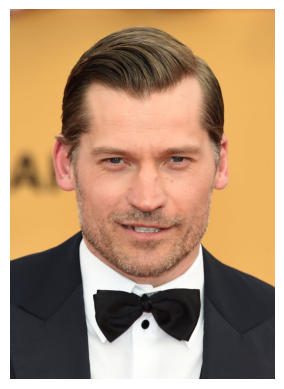

In [7]:
jamie = cv2.imread('./train/Jamie_Before.jpg')
jamie = cv2.cvtColor(jamie, cv2.COLOR_BGR2RGB)
showImg(jamie)

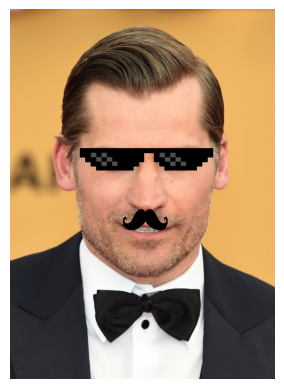

In [8]:
jamieOverlayed = overlay(jamie)
showImg(jamieOverlayed)

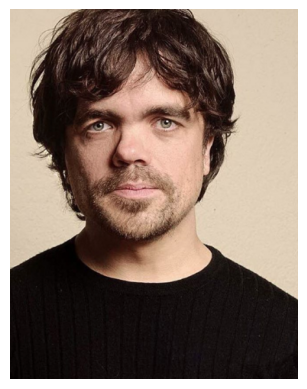

In [9]:
tyrion = cv2.imread('./test/Before.png')
tyrion = cv2.cvtColor(tyrion, cv2.COLOR_BGR2RGB)
showImg(tyrion)

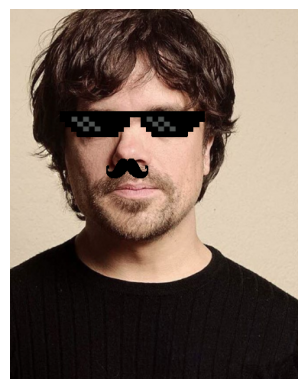

In [10]:
tyrionOverlayed = overlay(tyrion)
showImg(tyrionOverlayed)

In [13]:
tyrionOverlayed = tyrionOverlayed.reshape((-1,3))
df = pd.DataFrame(tyrionOverlayed, dtype='float')
df.columns = ['Channel 1','Channel 2','Channel 3']
df.head()

,Channel 1,Channel 2,Channel 3
0,219.0,202.0,180.0
1,220.0,203.0,181.0
2,219.0,202.0,180.0
3,220.0,203.0,181.0
4,219.0,202.0,180.0


In [15]:
df.to_csv('ans.csv', index=False)